# Feed Forward

Install [Anaconda](https://www.anaconda.com/products/distribution)

Make sure that Python 3.9 is installed.

Install the following packages:
- numpy

## Numpy matrix basics

In [1]:
import numpy as np
import random

# Initialize a numpy array of size (12, 4) and name it 'test'
# The values of the initalized array are to be created from a random normal distribution

np.random.seed(4)
test = np.random.normal(0, 1, (12, 4))


# Transpose the matrix 'test' and override the initial matrix

#test = np.transpose(test, axes=None) # test[4x12]


# Create a new numpy array of size (4, 3) and name it 'test_2' (initialized with a random uniform distribution with a low value of 0.1 and a high value of 0.9)
# Multiply (matrix multiplication) the matrix 'test' with the matrix 'test_2' respectively, and name the resulting matrix 'result'

test_2 = np.random.uniform(0.1, 0.9,(4,3))
#print(test_2)

result = np.matmul(test, test_2)
print(f'result: \n{result}')

row, columb = result.shape


# Print the size (shape) of your 'result' matrix

#print(test.shape)

#print(test_2.shape)


# Slice the matrix 'result' so that
 # 1: the first until the fifth index of the first dimension and the last index of the second dimension are used (result matrix shape == (5, ))
 # 2: the last index of the first dimension and all indices of the second dimension are used (result matrix shape == (3,))
 # 3: every second index of the first dimension (starting from index 1 - NOT 0) and the first index of the second dimension are used (result matrix shape == (6,))

slice_1 = result[:5, columb-1]
slice_2 = result[row-1,:columb]
slice_3 = result[1:row:2, 0]
#print(f'1: {slice_1} \nShape: {slice_1.shape} #Slice 1')
#print(f'2: {slice_2} \nShape: {slice_2.shape} #Slice 2')
#print(f'3: {slice_3} \nShape: {slice_3.shape} #Slice 3')



# Find the maximum of the matrix 'result' in every dimension, so that the size of the first dimension stays the same and the second dimension is of size 1 (result matrix shape == (12,))
# Use a numpy pre-implemented function for it and name the resulting matrix 'max_result'

max_value = []
for i in result:
    max_value.append(max(i))


max_value = np.array(max_value)
print(f'Max value: \n{max_value} \nShape: {max_value.shape} #Max Value')

max_value_numpy = np.amax(result, axis=1)
print(f'Max value numpy: \n{max_value_numpy} \nShape: {max_value_numpy.shape} #Max Value')



# Find the dimensional information where the max values are positioned in the 'result' matrix with a numpy function. Name the result matrix 'max_result_2'
# Use the dimensional information and slice the 'result' matrix by this information (neatly in a one-liner)

result_2 = result.argmax(axis=1)


max_value_2 = []

for i in range(row):
    max_value_2.append(result[i,result_2[i]])


max_value_2 = np.array(max_value_2)
print(f'Max value_2: \n{max_value_2} \nShape: {max_value_2.shape} #Max Value_2')


# Compare max_result and max_result_2. Are they the same?
# The comparison between the two matrix should either be True or False (not an array of True of False values)


print(np.array_equiv(max_value_2, max_value))



result: 
[[-0.04815711  0.7183881   0.40315279]
 [-1.42434554 -1.10546776 -1.28857067]
 [-0.03565644 -0.70661816 -0.49818873]
 [-0.02749257  0.48489594  0.03510279]
 [ 0.79356952  1.09674768  1.45438795]
 [-1.04546709 -1.17700198 -1.2095716 ]
 [ 2.69729371  0.7688925   1.19253927]
 [ 0.37369338 -0.10033159 -0.41039418]
 [-1.66470062 -1.42097458 -1.79793651]
 [ 2.3068787   2.0953459   1.97372133]
 [-1.43745086 -0.32136222 -0.80140252]
 [ 0.52122171  1.3411511   1.390438  ]]
Max value: 
[ 0.7183881  -1.10546776 -0.03565644  0.48489594  1.45438795 -1.04546709
  2.69729371  0.37369338 -1.42097458  2.3068787  -0.32136222  1.390438  ] 
Shape: (12,) #Max Value
Max value numpy: 
[ 0.7183881  -1.10546776 -0.03565644  0.48489594  1.45438795 -1.04546709
  2.69729371  0.37369338 -1.42097458  2.3068787  -0.32136222  1.390438  ] 
Shape: (12,) #Max Value
Max value_2: 
[ 0.7183881  -1.10546776 -0.03565644  0.48489594  1.45438795 -1.04546709
  2.69729371  0.37369338 -1.42097458  2.3068787  -0.32136222 

## Lets start with the Feed forward pass

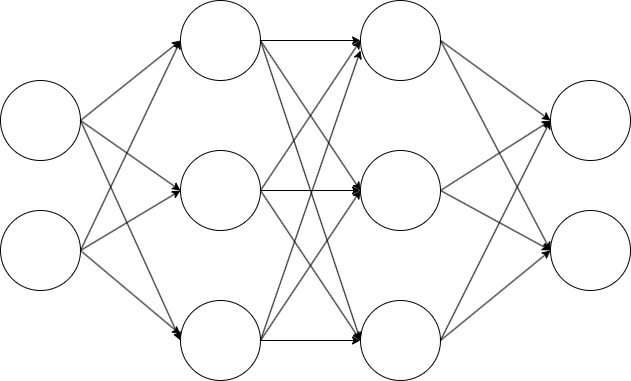

In [2]:
# Implement the forward pass of the following neural network structure
# The arrows show only in the forward direction (we discuss backprogation later)
# More instructions below the image

from IPython.display import Image
Image(filename='feed_forward.png')

In [3]:
# All the following initializations are to be created with a random normal distribution

# Initialize the layers and name them w_0, w_1 and w_2
# w_0 is connected to the input (left side), w_1 is the middle part of the network and w_2 is connected to the output (right side)
# The layers are no vectors! The layers represent an input dimension and output dimension and are therefore matrices!

# dimensions of the layers
input_dim = 2 # input dimension
middle_dim = 3 # middle layer dimension
output_dim = 3 # output dimension


np.random.seed(43)
w_0 = np.random.normal(0, 1, (input_dim, middle_dim))
w_1 = np.random.normal(0, 1, (middle_dim, middle_dim))
w_2 = np.random.normal(0, 1, (middle_dim, output_dim))

print(w_0)
print(w_1)
print(w_2)


# Use the vector _input as the network's input
_input = np.random.randn(2)

print(_input)


[[ 0.25739993 -0.90848143 -0.37850311]
 [-0.5349156   0.85807335 -0.41300998]]
[[ 0.49818858  2.01019925  1.26286154]
 [-0.43921486 -0.34643789  0.45531966]
 [-1.66866271 -0.8620855   0.49291085]]
[[-0.1243134   1.93513629 -0.61844265]
 [-1.04683899 -0.88961759  0.01404054]
 [-0.16082969  2.23035965 -0.39911572]]
[0.05444456 0.88418182]


In [4]:
# Perform the matrix multiplications to get the output (print the output)

output = np.dot(_input, w_0)  # 1x3 matrix


output = np.dot(output, w_1)  # 1x3 matrix
output = np.dot(output, w_2)  # 1x3 matrix

print(output)


[ 0.93383147 -0.05263915  0.10253128]


In [13]:
# Set all weight except one path to zero and compare the result of the output to your own (path) calculations.
# A path is defined here as one input to output connection by passing only one node per layer.
# Is the result correct?

path = [0, 0, 0]  
# First path: first node in the first layer to the first node in the second layer, and the first node in the second layer to the first node in the third layer

# setting all weights to zero except for the specified path
mask_w_0 = np.zeros_like(w_0)
mask_w_0[path[0], path[1]] = 1

mask_w_1 = np.zeros_like(w_1)
mask_w_1[path[1], path[2]] = 1

mask_w_2 = np.zeros_like(w_2)
mask_w_2[path[2]] = 1

# Applying the masks to the weight matrices
masked_w_0 = w_0 * mask_w_0
masked_w_1 = w_1 * mask_w_1
masked_w_2 = w_2 * mask_w_2

# matrix multiplications using the masked weights
output_masked = np.dot(_input, masked_w_0)  # First layer multiplication
output_masked = np.dot(output_masked, masked_w_1)   # Second layer multiplication
output_masked = np.dot(output_masked, masked_w_2)   # Third layer multiplication

# Calculate the output using your own (path) calculations
output_path = _input[path[0]]
output_path = output_path * mask_w_0[path[0], path[1]]  # First layer multiplication
output_path = output_path * mask_w_1[path[1], path[2]]  # Second layer multiplication
output_path = output_path * mask_w_2[path[2]]  # Third layer multiplication

print("Output (Masked):")
print(output_masked)

print("Output (Path Calculation):")
print(output_path)

# Compare the two outputs
are_outputs_equal = np.allclose(output_masked, output_path)

print(f'The outputs are equal: True or False\nAnswer: {are_outputs_equal}')






Output (Masked):
[-0.00086791  0.0135104  -0.00431774]
Output (Path Calculation):
[0.05444456 0.05444456 0.05444456]
The outputs are equal: True or False
Answer: False
